<a href="https://colab.research.google.com/github/BlueGrisGris/am216/blob/ethan_tsne/tsne_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os.path
import tensorflow as tf
import json
from sklearn.model_selection import train_test_split
from  sklearn.manifold import TSNE as TSNE
from sklearn.svm import SVC as SVC
from sklearn.decomposition import PCA as PCA
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)
from matplotlib import offsetbox
from time import time

In [2]:
import os
from google.colab import drive 
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Mini Project")

print(os.listdir())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Mini-projects-2022.zip', 'Mini-projects-2022.zip (Unzipped Files)', 'Exoplanets', 'local.csv', 'global.csv', 'labels.csv', 'AM216_Exoplanets (1).ipynb', 'conv_model', 'dense_model', 'AM216_Exoplanets.ipynb', 'lstm_model', 'model.png', 'conv_model.h5', 'plots']


In [3]:
local_data = np.loadtxt('local.csv')
global_data = np.loadtxt('global.csv')
labels = np.loadtxt('labels.csv')

local_train, local_test, y_train, y_test = train_test_split(local_data, labels, test_size=0.2, random_state=1)

global_train, global_test, y_train2, y_test2 = train_test_split(global_data, labels, test_size=0.2, random_state=1)

### Generate the mini labeled light intensity plots to put inside the low dim tsne space
### Computationally expensive so only do once

# plt.clf
# for pp in range(1640,3148):
# # for pp in range(8):
# #     print(pp)
#     ax = plt.axes()
#     plt.plot(local_test[pp,:],color = "black")
#     plt.yticks([])
#     plt.xticks([])
#     if y_test[pp] == 0:
#         ax.set_facecolor("red")
#     if y_test[pp] == 1:
#         ax.set_facecolor("blue")
#     plt.savefig("plots/lc" + str(pp) + ".png" )
# #     plt.show()
#     plt.clf
   

In [4]:
from tensorflow.keras.models import load_model

model = load_model("conv_model")


Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 2001, 1)]    0           []                               
                                                                                                  
 conv1d_14 (Conv1D)             (None, 1997, 16)     96          ['input_6[0][0]']                
                                                                                                  
 conv1d_15 (Conv1D)             (None, 1993, 16)     1296        ['conv1d_14[0][0]']              
                                                                                                  
 max_pooling1d_7 (MaxPooling1D)  (None, 995, 16)     0           ['conv1d_15[0][0]']              
                                                                                           

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


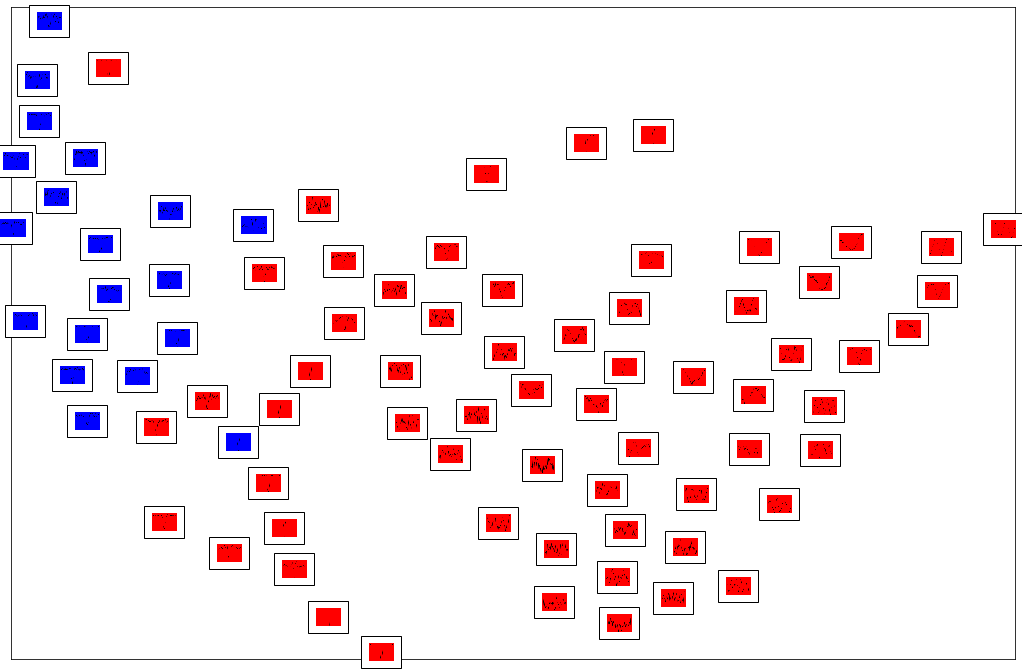

In [26]:
local_len = local_train.shape[1]
global_len = global_train.shape[1]
local_input = tf.keras.Input(shape=(local_len,1))
global_input = tf.keras.Input(shape=(global_len,1))

X = model.layers[-2].output
model2 = tf.keras.Model(inputs = model.inputs,outputs = X)
model2.summary()


X = model2.predict((local_test,global_test))
y = y_test

# X = local_test[1:1000]
# y = y_test[1:1000]

# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize = (18,12))
    ax = plt.subplot(111)
#     for i in range(X.shape[0]):
#         plt.text(X[i, 0], X[i, 1], str(y[i]),
#                  color=plt.cm.Set1(y[i]),
#                  fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
#         with open('Exoplanets/PC/0.json', 'r') as fp:
#             exo_dictionary = json.load(fp)
#         with "plots/lc" + str(pp) + ".png" as file:
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            arr_img = plt.imread("plots/lc" + str(i) + ".png")
            
            imagebox = offsetbox.AnnotationBbox(
#                 offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r)
                offsetbox.OffsetImage( arr_img , cmap=plt.cm.gray_r,zoom = .05)
                , X[i]
                , xybox= 1*X[i]
                , xycoords = 'data'
            )
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

### Run Tsne embedding and plot 
plt.clf
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne
#                "t-SNE embedding of the digits (time %.2fs)" %
#                (time() - t0)
              )
plt.show()